# Bibliotecas para o funcionamento do programa  üìî 

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, mean_squared_error, accuracy_score

# Carregando o conjunto de dados de emiss√µes de carbono  üìà 

FONTE - *Data on CO2 and Greenhouse Gas Emissions by Our World in Data: https://github.com/owid/co2-data*

In [24]:
df = pd.read_csv('owid-co2-data.csv')


## An√°lise Explorat√≥ria dos Dados

Descri√ß√£o do Processo de Limpeza:

Remover dados ausentes e inconsistentes.
Filtrar registros irrelevantes e corrigir valores extremos.
Verificar a consist√™ncia das vari√°veis e remover duplicatas.
Realizar transforma√ß√µes de dados necess√°rias, como normaliza√ß√£o e padroniza√ß√£o.


In [27]:

df = df.dropna()
df = df.drop_duplicates()

threshold = len(df) * 0.5
df_cleaned = df.dropna(thresh=threshold, axis=1)

df_cleaned.fillna(df_cleaned.select_dtypes(include=['float64', 'int64']).mean(), inplace=True)




Calculando os 5 primeiros paises que mais emetiram carbono entre 1970 (Inicio da producao de micro computadores e computadores) ate a atualidade ano de 2024


In [26]:
df_filtered = df[(df['year'] >= 1970) & (df['year'] <= 2024)]
total_emissions = df_filtered.groupby('country')['co2'].sum().sort_values(ascending=False)

total_emissions = df_filtered.groupby('country')['co2'].sum().sort_values(ascending=False)
top_emitters = total_emissions.head(5).index


# Plotando Graficos

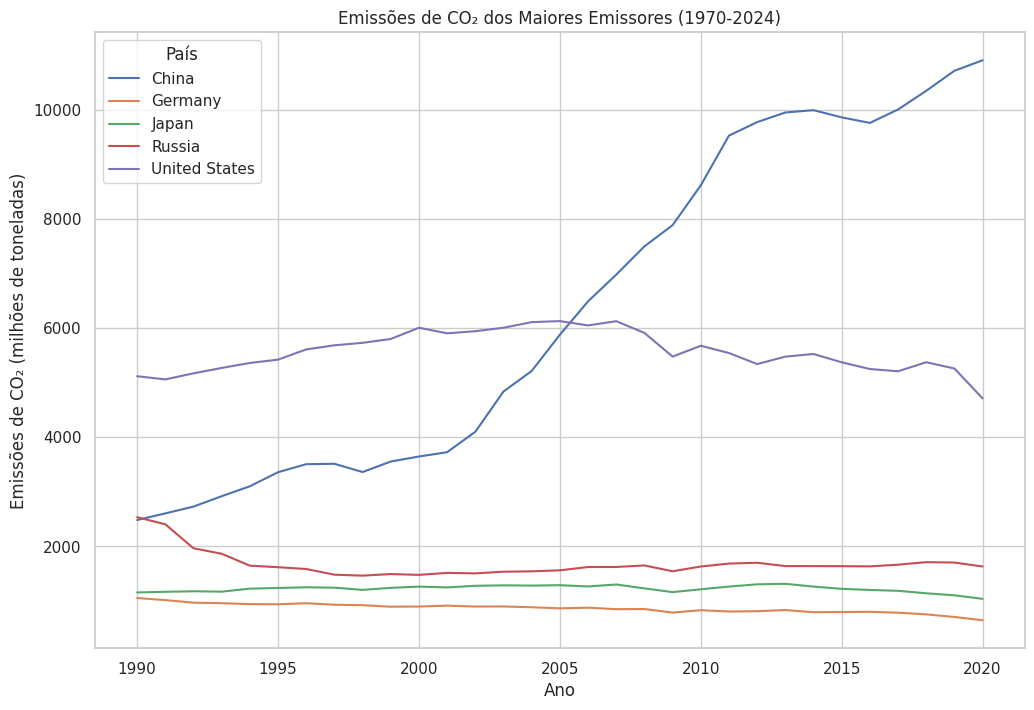

In [33]:
df_top_emitters = df_filtered[df_filtered['country'].isin(top_emitters)]
df_pivot = df_top_emitters.pivot(index='year', columns='country', values='co2')

df_pivot.plot(figsize=(12, 8))
plt.title('Emiss√µes de CO‚ÇÇ dos Maiores Emissores (1970-2024)')
plt.xlabel('Ano')
plt.ylabel('Emiss√µes de CO‚ÇÇ (milh√µes de toneladas)')
plt.legend(title='Pa√≠s')
plt.grid(True)
plt.show()


# Modelagem de Machine Learning
Para analisar e prever tend√™ncias, vamos utilizar dois algoritmos: regress√£o linear para prever valores num√©ricos e um classificador (Random Forest) para classifica√ß√£o de categorias de emiss√£o.

1. Regress√£o Linear
Usaremos o modelo de regress√£o linear para prever as emiss√µes de CO2 futuras com base nos dados hist√≥ricos.

In [ ]:
X = df[['Year']]
y = df['CO2 Emissions (Mt)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

y_pred = linear_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


# Criando uma coluna de categorias para classificar as regi√µes


In [ ]:
df['Emission Category'] = pd.cut(df['Per Capita Emissions'], bins=[0, 5, 10, 15], labels=['Baixo', 'M√©dio', 'Alto'])


# Separando os dados para classifica√ß√£o


In [ ]:
X = df[['Year']]
y = df['Emission Category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Treinando o modelo de classifica√ß√£o


In [ ]:
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

# Avaliando o modelo de classifica√ß√£o


In [ ]:
y_pred = classifier.predict(X_test)
print(classification_report(y_test, y_pred))
